### Oppgave 4) Dataanalyse

Det kan være nyttig å se på medianen fordi datasettet kan ha et stort sprik mellom verdiene og variere mye og dermed ser man på den midterste verdien. Gjennomsnitt gir et generelt bilde av målingene og gir den beste sentrale verdien. Standardavvik bruker en til å se på hvor stor variasjon det er i dataen. Variablene i datasettet "temperaturdata" er temperatur og tid. Vi visualiserer tid langs x aksen ettersom det er kronologisk, og stiger rett, i motsetning til temp målingene. Datasettet er sjekket for både tomme verdier og urealistiske verdier, noe som sikrer at dataen stemmer. En annen ting er å visualisere alle verdier og dermed kan man enkelt se hvor ting ikke stemmer dersom feil har forekommet. Vi vil visualisere i et scatterplot med en trukket linje mellom hvert punkt.


Her plotter vi først all data for å se at det ser riktig ut

Coordinates 63.444637298583984°N 10.36649227142334°E
Elevation 14.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


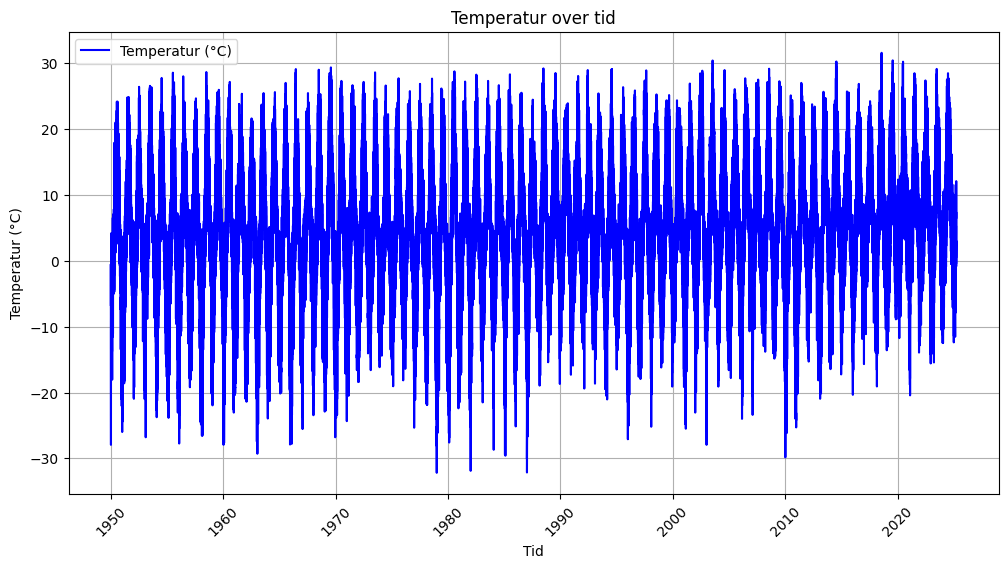

In [2]:
import openmeteo_requests
import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# API-forespørsel
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 63.43,
    "longitude": 10.39,
    "start_date": "1950-01-01",
    "end_date": "2025-03-22",
    "hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Prosesser første sted
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Hent temperaturdata
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {
    "date": pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
    ),
    "temperature_2m": hourly_temperature_2m
}

hourly_dataframe = pd.DataFrame(data=hourly_data)


# === Plot temperatur over tid ===
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], label="Temperatur (°C)", color='blue')

# Formatering av plottet
plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.title("Temperatur over tid")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Vis plottet
plt.show()


Her ser man at vi har veldig mange punkt som blir plottet, så videre ønsker vi å plotte et årlig gjennomsnitt istedet slik at det visuelt blir mer appelerende.

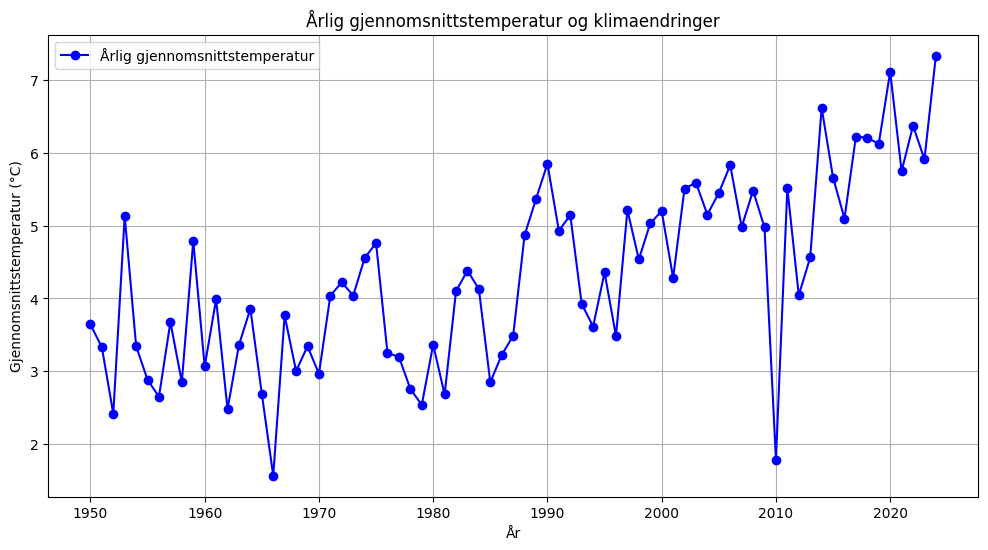

In [3]:
import openmeteo_requests
import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# API-forespørsel
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 63.43,
    "longitude": 10.39,
    "start_date": "1950-01-01",
    "end_date": "2024-12-31",
    "hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Prosesser første sted
response = responses[0]
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {
    "date": pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
    ),
    "temperature_2m": hourly_temperature_2m
}

hourly_dataframe = pd.DataFrame(data=hourly_data)

# === Beregn årlig gjennomsnittstemperatur ===
hourly_dataframe["year"] = hourly_dataframe["date"].dt.year  # Ekstraher år
yearly_avg_temp = hourly_dataframe.groupby("year")["temperature_2m"].mean()  # Årlig gjennomsnitt

# === Plot årlig gjennomsnittstemperatur ===
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label="Årlig gjennomsnittstemperatur", color='blue', marker="o")



# Formatering
plt.xlabel("År")
plt.ylabel("Gjennomsnittstemperatur (°C)")
plt.title("Årlig gjennomsnittstemperatur og klimaendringer")
plt.legend()
plt.grid(True)

# Vis plottet
plt.show()


Videre plotter vi da grad med både gjennomsnittet, median og standardavvik

      Gjennomsnitt  Median  Standardavvik
year                                     
1950      3.642528   3.548       9.342967
1951      3.329530   3.248       8.950919
1952      2.414126   2.798       8.662530
1953      5.134981   4.898       8.609881
1954      3.345266   3.148       9.200182
1955      2.880888   2.423       9.435687
1956      2.650021   3.248       9.042768
1957      3.675728   3.398       7.965725
1958      2.849712   4.173      10.442178
1959      4.788383   4.598       8.400384


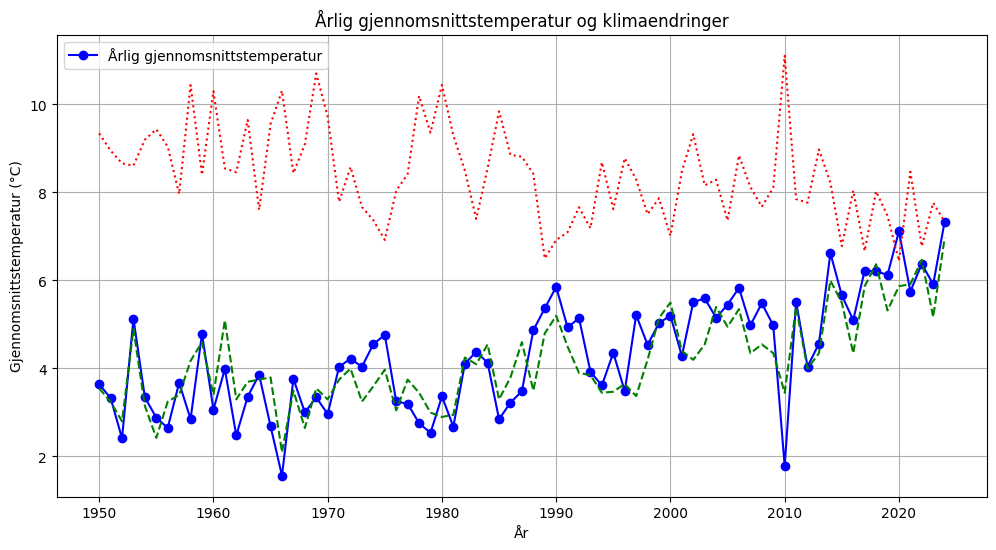

In [5]:
import openmeteo_requests
import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# API-forespørsel
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 63.43,
    "longitude": 10.39,
    "start_date": "1950-01-01",
    "end_date": "2024-12-31",
    "hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Prosesser første sted
response = responses[0]
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {
    "date": pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
    ),
    "temperature_2m": hourly_temperature_2m
}

hourly_dataframe = pd.DataFrame(data=hourly_data)

# === Beregn årlig gjennomsnittstemperatur ===
hourly_dataframe["year"] = hourly_dataframe["date"].dt.year  # Ekstraher år
yearly_avg_temp = hourly_dataframe.groupby("year")["temperature_2m"].mean()  # Årlig gjennomsnitt

# Beregn årlig median og standardavvik
yearly_median_temp = hourly_dataframe.groupby("year")["temperature_2m"].median()
yearly_std_temp = hourly_dataframe.groupby("year")["temperature_2m"].std()

# Kombiner til én DataFrame for oversikt
yearly_stats = pd.DataFrame({
    "Gjennomsnitt": yearly_avg_temp,
    "Median": yearly_median_temp,
    "Standardavvik": yearly_std_temp
})

# Skriv ut de første 10 årene som eksempel
print(yearly_stats.head(10))



# === Plot årlig gjennomsnittstemperatur ===
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label="Årlig gjennomsnittstemperatur", color='blue', marker="o")



# Formatering
plt.xlabel("År")
plt.ylabel("Gjennomsnittstemperatur (°C)")
plt.title("Årlig gjennomsnittstemperatur og klimaendringer")
plt.legend()
plt.grid(True)

plt.plot(yearly_median_temp.index, yearly_median_temp.values, label="Median", color='green', linestyle="--")
plt.plot(yearly_std_temp.index, yearly_std_temp.values, label="Standardavvik", color='red', linestyle=":")
# Vis plottet
plt.show()


